# Notebook ini dikerjakan oleh: Prayoga Agusto Haradi, Batch HCK-004 untuk pengerjaan Milestone 2 pada Phase 2

## Latar Belakang

Klasifikasi ikan merupakan tugas penting dalam biologi kelautan dan industri akuakultur, karena dapat memberikan wawasan yang berharga dalam identifikasi spesies ikan, pemantauan populasi, dan penelitian ekologi. Namun, metode tradisional klasifikasi ikan, seperti pengamatan manual dan pengukuran fisik akan memakan waktu, mahal, dan rentan terhadap kesalahan. Dengan kemajuan dalam computer vision dan deep learning, proses klasifikasi ikan dapat diotomatisasi dengan menggunakan image analysis techniques. 

Proyek ini bertujuan untuk mengembangkan model klasifikasi gambar yang dapat secara akurat mengidentifikasi spesies ikan yang berbeda berdasarkan gambar mereka, menggunakan pembelajaran transfer dan jaringan saraf tiruan. Dengan mengotomatisasi proses klasifikasi ikan, proyek ini dapat memberikan metode identifikasi spesies ikan yang lebih cepat, lebih akurat, dan hemat biaya, yang dapat bermanfaat bagi industri biologi kelautan dan akuakultur, serta komunitas ilmiah yang lebih luas.

## Objektif

Tujuan dari proyek ini adalah untuk mengembangkan model klasifikasi gambar yang akurat dan efisien untuk identifikasi spesies ikan, dengan menggunakan teknik deep learning dan transfer learning. Model ini akan dilatih pada dataset gambar ikan yang besar, yang berisi banyak spesies, dan akan dapat mengklasifikasikan gambar ikan baru ke dalam salah satu kategori yang telah ditentukan dengan akurasi tinggi. 

Model ini akan dioptimalkan untuk kecepatan dan efisiensi, sehingga cocok untuk aplikasi real-time di lapangan. Dengan mencapai tujuan ini, proyek ini dapat menjadi alat yang berharga bagi ahli biologi kelautan, industri akuakultur, dan peneliti, yang memungkinkan mereka untuk mengotomatisasi proses klasifikasi ikan dan mendapatkan wawasan tentang dinamika populasi ikan, keanekaragaman hayati, dan penelitian ekologi.

## Dataset

[Dataset](https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset)

Dataset yang akan digunakan disebut " A Large-Scale Fish Dataset" dan dihosting di Kaggle. Ini adalah dataset yang tersedia untuk umum yang berisi 9 kelas spesies ikan, termasuk Black Sea Sprat, Gilt-Head Bream, Horse Mackerel, Red Mullet, Red Sea Bream, Sea Bass, Shrimp, Striped Red Mullet, dan Trout. Dataset ini mencakup total 9.000 gambar ikan berwarna, dengan resolusi dan rasio aspek yang bervariasi. 

Gambar-gambar tersebut diambil menggunakan kamera, kondisi pencahayaan, dan latar belakang yang berbeda, yang membuat dataset ini menantang dan realistis. Dataset ini dapat digunakan untuk berbagai tugas computer vision, seperti object detection, image segmentation, dan image classification, terutama dalam konteks identifikasi spesies ikan dan pemantauan populasi.


## Import Library

Import Library yang akan digunakan.

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from pathlib import Path
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
from tensorflow.python.client import device_lib

Mengecek apakah tensorflow kita sudah menggunakan GPU

In [44]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11300852136695653565,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5736759296
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3391815893037155519
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"]

## Data Loading

Kita akan melakukan loading data menggunakan module Path dan os untuk membaca gambar kita berdasarkan directory yang kita pakai untuk menyimpan gambar dan membaca image kita dengan extension png (semua data gambar di kasus ini menggunakan .png), dan label berdasarkan nama folder yang ada di filepath. Lalu kita akan membuata dataframe dengan filepath gambar dengan nama kolom "Images" dan kolom lain dengan labelnya.

In [4]:
direc = Path('C:/Users/Administrator/Documents/M2P2_Data')
filepaths = list(direc.glob(r'**/*.png'))
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))


filepaths = pd.Series(filepaths, name='Images').astype(str)
Labels = pd.Series(Labels, name='Labels').astype(str)


df = pd.merge(filepaths, Labels, right_index = True, left_index = True)

#Resampling it
df=df.sample(frac = 1).reset_index(drop=True)
df.head(10)

,Images,Labels
0,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Shrimp
1,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Black Sea Sprat
2,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Red Sea Bream
3,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Shrimp
4,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Gilt-Head Bream
5,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Hourse Mackerel
6,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Striped Red Mullet
7,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Red Mullet
8,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Trout
9,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Sea Bass


In [5]:
df.tail(10)

,Images,Labels
8990,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Black Sea Sprat
8991,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Striped Red Mullet
8992,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Black Sea Sprat
8993,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Sea Bass
8994,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Red Mullet
8995,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Hourse Mackerel
8996,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Hourse Mackerel
8997,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Gilt-Head Bream
8998,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Striped Red Mullet
8999,C:\Users\Administrator\Documents\M2P2_Data\Fis...,Striped Red Mullet


## Exploratory Data Analysis

kita akan mengecek data kita menggunakan df.info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Images  9000 non-null   object
 1   Labels  9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


Lalu menghitung jumlah gambar pada tiap kategori menggunakan bar plot.

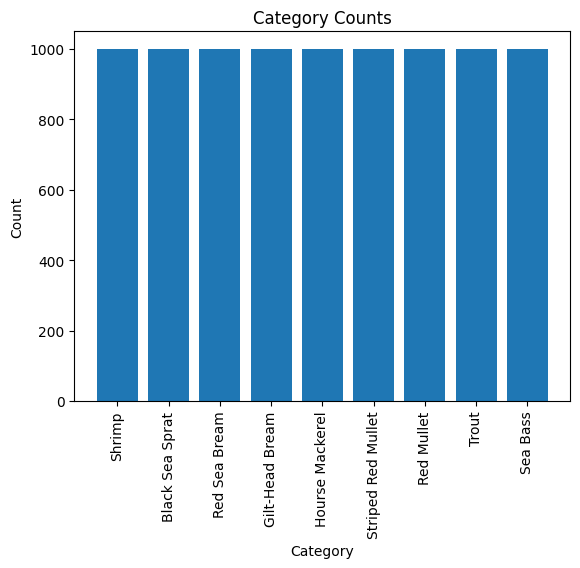

In [7]:
# Count the number of occurrences of each category
category_counts = df['Labels'].value_counts()

# Create a bar plot
fig, ax = plt.subplots()
ax.bar(x=category_counts.index, height=category_counts.values)

# Set axis labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Category Counts')

# Rotate the x-axis tick labels if they are long
plt.xticks(rotation=90)

# Show the plot
plt.show()

Berdasarkan bar plot diatas, kita dapat menyimpulkan bahwa data kita seimbang untuk tiap kategori.

Kita akan menunjukkan semua gambar dari tiap kategori yang unik menggunakan plt.subplots

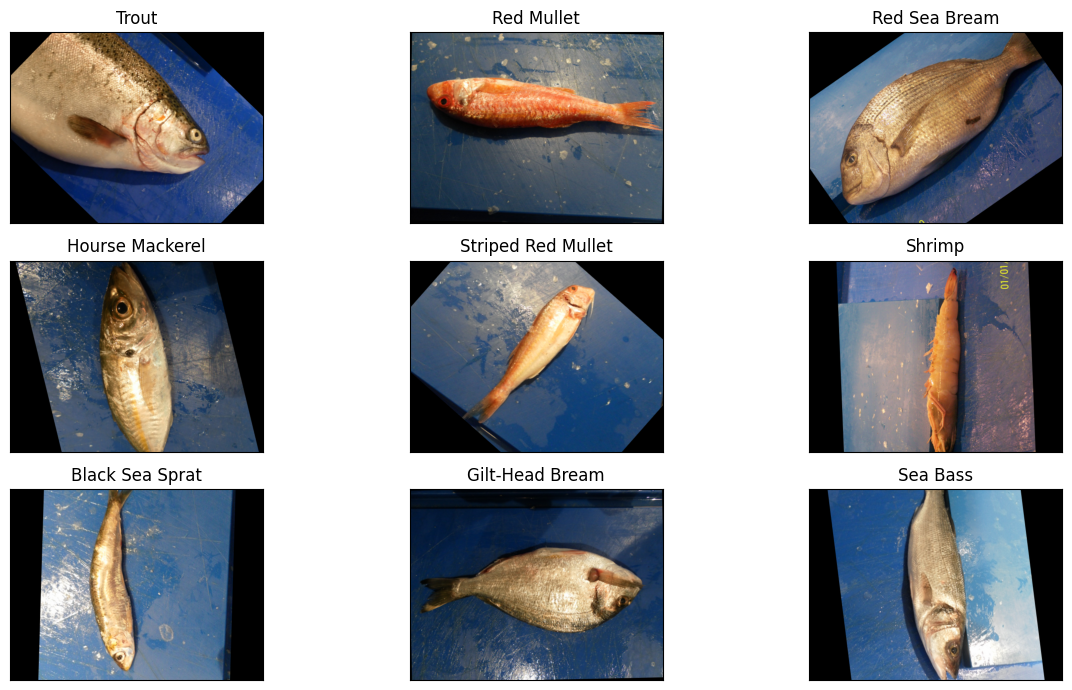

In [8]:
shown_labels = set()
f,a = plt.subplots(nrows=3, ncols=3,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
# Loop through the images
for i, ax in enumerate(a.flat):
    
    # Find the next image with a label that hasn't been shown yet
    while True:
        img_idx = np.random.randint(len(df))
        label = df.Labels[img_idx]
        if label not in shown_labels:
            shown_labels.add(label)
            break
    
    # Show the image and label
    ax.imshow(plt.imread(df.Images[img_idx]))
    ax.set_title(label)
    
    # Break out of the loop if all unique labels have been shown
    if len(shown_labels) == 9:
        break
    
plt.tight_layout()
plt.show()

In [9]:
print(f" Count of Rows : {df.shape[0]} \n Count of Columns : {df.shape[1]} ")

 Count of Rows : 9000 
 Count of Columns : 2 


## Feature Engineering

Kita akan melakukan splitting menggunakan train-test split dengan rasio train 80% dan test 20%

In [10]:
df_train, df_test = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)
print('Original set  ---> ',df.shape,'\nTraining set  ---> ',df_train.shape,'\nTesting set   ---> ', df_test.shape)

Original set  --->  (9000, 2) 
Training set  --->  (7200, 2) 
Testing set   --->  (1800, 2)


Kita akan menentukan batch size sebesar 128 dengan resizing image training data kita ke ukuran (224,224) pixels. Hal ini dilakukan untuk mempercepat training data tanpa mengorbankan akurasi dan performa dari model.

In [11]:
batch_size = 128
target_size = (224,224)

Selanjutnya, kita akan melakukan preprocessing pada train dan test dataset menggunakan ImageDataRegenerator. Untuk train dataset, kita juga akan melakukan data augmentation supaya model dapat memprediksi dan mengeneralisir data baru yang akan diprediksi dengan akurat. Augmentasi dan preprocessing yang dilakukan pada train set adalah:
- rotation_range = 20: Memutar gambar secara acak maksimal 20 derajat. Hal ini membantu meningkatkan ketahanan model terhadap variasi orientasi gambar.

- width_shift_range = 0.2 dan height_shift_range = 0.2: Menggeser gambar secara acak secara horizontal dan vertikal hingga 20% dari lebar dan tinggi gambar. Hal ini membantu mensimulasikan variasi dalam pemosisian dan pembingkaian kamera.

- shear_range = 0.2: Menerapkan transformasi geser secara acak ke gambar hingga 20 derajat. Hal ini membantu mensimulasikan distorsi dalam bentuk objek dalam gambar.

- zoom_range=0.2: Memperbesar atau memperkecil gambar secara acak hingga 20%. Hal ini membantu mensimulasikan variasi dalam jarak kamera dari objek dalam gambar.

- horizontal_flip=True dan vertical_flip=True: Membalikkan gambar secara acak, masing-masing secara horizontal dan vertikal. Hal ini membantu mensimulasikan variasi dalam orientasi objek dalam gambar.

- fill_mode = 'terdekat': Mengisi pixel yang baru dibuat selama proses augmentasi data dengan nilai pixel terdekat dari gambar asli.

- preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input: Menerapkan fungsi preprocessing dari model MobileNet_v2 ke setiap gambar sebelum dimasukkan ke dalam model. Fungsi ini bertujuan untuk melakukan normalisasi pada nilai pixel gambar agar berada dalam range -1 hingga 1, yang merupakan range yang diharapkan oleh model MobileNet_v2.

- validation_split = 0.2: Menyisihkan 20% dari gambar pelatihan untuk validasi selama pelatihan.

Sedangkan untuk test set, kita hanya akan melakukan preprocessing dengan tf.keras.applications.mobilenet_v2.preprocess_input untuk menormalisasikan nilai pixel pada gambar yang akan diprediksi. 

Sehingga, dengan adanya augmentasi yang sudah dilakukan diatas pada training set, model kita dapat memprediksi dan mengeneralisir lebih baik untuk berbagai tipe gambar walaupun bentuk gambar training berbeda dengan gambar yang akan diprediksi. Sedangkan preprocessing yang dilakukan oleh tf.keras.applications.mobilenet_v2.preprocess_input pada train dan test set bertujuan untuk membuat model lebih cepat mencapai convergence dan juga untuk membuat model lebih stabil dalam perhitungannya.

Dengan adanya preprocessing dan data augmentation pada training set kita, model akan dapat memprediksi gambar-gambar ikan yang memiliki karakteristik berbeda dengan gambar pada training set. Sebagai contoh, model kita dapat mengklasifikasi ikan dengan akurat apabila gambar tersebut diambil pada habitat aslinya, atau apabila gambar ikan yang difoto hanya sebagian saja karena ikan yang ingin difoto bergerak dengan cepat dan sudah tidak dapat difoto lagi, etc.

In [12]:
train_datagen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,validation_split=0.2)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

Selanjutnya, kita akan menggunakan .flow_from_dataframe() untuk meng-apply augmentasi dan preprocessing ke data test kita. .flow_from_dataframe() adalah sebuah metode dalam kelas ImageDataGenerator Keras yang menghasilkan sekumpulan data yang telah ditambah/dinormalisasi dari sebuah dataframe yang berisi path ke file gambar dan label yang sesuai.

Dibutuhkan sebuah dataframe Pandas sebagai input yang mencakup path ke setiap file gambar dan kelas/label yang sesuai. Metode ini membaca gambar dari path file gambar tersebut, menerapkan berbagai augmentasi data (seperti rotasi, pembesaran, pembalikan horizontal/vertikal yang sudah dilakukan sebelumnya pada ImageDataGenerator) dan mengubah ukurannya ke ukuran tertentu. Kemudian menormalkan nilai piksel pada gambar dengan membagi setiap nilai pixel.

Terakhir, function ini akan mengembalikan generator Python yang menghasilkan kumpulan data gambar dan label, yang dapat digunakan untuk melatih model deep learning di Keras. Metode flow_from_dataframe() memungkinkan penanganan yang mudah untuk dataset yang besar tanpa memuat semua gambar ke dalam memori sekaligus.

In [13]:
train_gen = train_datagen.flow_from_dataframe(df_train,
                                              x_col = 'Images', y_col ='Labels',
                                              target_size = target_size,
                                              color_mode='rgb',batch_size = batch_size, 
                                              class_mode = 'categorical', shuffle = True, seed=42,
                                              subset='training')
val_gen = train_datagen.flow_from_dataframe(df_train, 
                                            target_size=target_size, x_col = 'Images', y_col ='Labels',color_mode='rgb', 
                                            class_mode='categorical',
                                            batch_size= batch_size, shuffle=True,seed=42,
                                            subset='validation')
test_gen = test_datagen.flow_from_dataframe(df_test,
                                            target_size = target_size, x_col = 'Images', y_col ='Labels',
                                             class_mode = 'categorical',color_mode='rgb',
                                            batch_size = batch_size, shuffle = False)

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [14]:
train_gen.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

## Model Definition

Pada kasus ini, kita akan melakukan training 2 model dengan architecture yang berbeda. Model pertama merupakan model yang dasar dan model kedua merupakan model yang sudah dilakukan improvement menggunakan transfer learning.

Model pertama yang akan kita definisikan adalah model sequential dengan architecture sebagai berikut.

In [16]:
default_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(9, activation='softmax')
])

default_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
default_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               50466944  
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1161      
Total params: 50,469,001
Trainable params: 50,469,001
Non-trainable params: 0
_________________________________________________________________


Mengenai model sequential awal yang kita buat, berikut adalah penjelasan rinci dari setiap layer dalam default_model:

- Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)): Ini adalah convolution layer dengan 32 filter berukuran 3x3. Fungsi aktivasi yang digunakan adalah Rectified Linear Unit (ReLU). Bentuk input dari layer ini adalah (224, 224, 3), yang sesuai dengan gambar berukuran 224x224 pixel dengan 3 channel warna (RGB).

- MaxPooling2D(): Ini adalah layer max pooling yang menurunkan sampel output dari convolution layer dengan mengambil nilai maksimum di setiap wilayah 2x2. Hal ini membantu mengurangi dimensi spasial dan mengendalikan overfitting.

- Flatten(): Layer ini meratakan output dari layer sebelumnya dan mengubahnya ke bentuk vektor 1D. Hal ini dilakukan agar output dapat diteruskan ke layer yang terhubung penuh (Dense).

- Dense(128, aktivasi = 'relu'): Ini adalah layer yang terhubung penuh dengan 128 neuron. Fungsi aktivasi yang digunakan adalah ReLU.

- Dense(9, activation='softmax'): Ini adalah layer terakhir dari model, yang memiliki 9 neuron yang sesuai dengan 9 kelas dalam dataset. Fungsi aktivasi yang digunakan adalah softmax, yang menghasilkan distribusi probabilitas pada kelas-kelas tersebut.

Model ini dicompile dengan optimizer Adam, fungsi loss categorical_crossentropy (karena kasus kita merupakan kasus multi-class classification), dan akurasi sebagai metrik evaluasi.

Selain itu, kita juga melihat bahwa total param pada model default kita adalah sebanyak 50,469,001. Hal ini menunjukkan bahwa dengan banyaknya jumlah param yang ada pada model, training yang akan dilakukan oleh model akan cukup lama untuk mencapai titik optimal.

In [15]:
mnv2_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

mnv2_model.trainable = False

Kode ini menginisialisasi model MobileNetV2 yang telah dilatih sebelumnya dari Keras Applications.

- input_shape = (224, 224, 3) menentukan bentuk input dari model, yaitu gambar dengan 224x224 pixel dan 3 saluran warna (RGB).
- include_top = False menentukan bahwa kita tidak ingin menyertakan layer teratas dari model yang sudah dilatih, yang digunakan untuk klasifikasi. Kita akan menambahkan layer klasifikasi kita sendiri nanti.
- weights = 'imagenet' menentukan bahwa kita ingin memuat bobot model yang telah dilatih sebelumnya yang telah dilatih pada dataset ImageNet.
- pooling='avg' menentukan bahwa kita ingin menggunakan pooling rata-rata global di layer terakhir model untuk mengurangi dimensi spasial dari peta fitur keluaran menjadi vektor dengan panjang tetap.
- mnv2_model.trainable = False, membekukan semua layer pada model yang telah dilatih sebelumnya sehingga bobotnya tidak akan diperbarui selama pelatihan model baru yang akan dibangun di atas model yang telah dilatih sebelumnya.

Kita dapat juga mengubah parameter pooling menjadi pooling='max' untuk melakukan max pooling dan weights=None untuk menggunakan weighting dari awal. Namun untuk kasus ini, kita akan menggunakan sesuai kode diatas.

In [17]:
# Define the model architecture
model = tf.keras.models.Sequential([
    # Convolutional layers
    mnv2_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(9, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model yang di-improve adalah convolutional neural network (CNN) yang menggunakan transfer learning dengan fine-tuning model MobileNetV2 yang telah dilatih sebelumnya pada dataset ImageNet.

Berikut ini penjelasan rinci dari setiap layer:

- tf.keras.applications.MobileNetV2 - Ini adalah model MobileNetV2 yang telah dilatih sebelumnya dari modul tf.keras.applications. Digunakan bentuk input (224, 224, 3) dan mencakup semua layer hingga global average pooling layer (pada model mobilenet_v2).

- Flatten - layer ini meratakan output dari layer MobileNetV2, yang merupakan tensor 3D, menjadi tensor 1D.

- Dense(256, activation='relu') - Ini adalah layer yang terhubung penuh dengan 256 unit dan aktivasi ReLU. layer ini mengambil output yang diratakan dari layer sebelumnya sebagai input.

- Dropout(0.2) - layer ini secara acak menetapkan 20% unit input ke 0 pada setiap pembaruan selama pelatihan, yang membantu mencegah overfitting.

- Dense(128, activation='relu') - Ini adalah layer lain yang terhubung penuh dengan 128 unit dan aktivasi ReLU.

- Dropout(0.2) - layer dropout lainnya untuk mencegah overfitting.

- Dense(9, activation='softmax') - layer terakhir yang terhubung penuh dengan 9 unit (satu untuk setiap kelas) dan fungsi aktivasi softmax, yang menormalkan output ke dalam distribusi probabilitas di atas 9 kelas.

Dibandingkan dengan default_model, model yang di-improve menggunakan transfer learning untuk memanfaatkan bobot yang telah dilatih sebelumnya dari model MobileNetV2, yang merupakan arsitektur CNN yang lebih dalam dan lebih kompleks daripada model default. Hal ini memungkinkan model yang di-improve untuk menangkap lebih banyak fitur abstrak dari gambar input, yang mengarah ke kinerja yang lebih baik. Selain itu, model yang di-improve menggunakan layer dropout untuk mencegah overfitting dan mengurangi varians model. Kita juga menggunakan 2 hidden layer Dense dengan jumlah neuron yang berkurang dari 256 ke 128 untuk mengurangi biaya komputasi pada model dan untuk mencegah overfitting pada training model.

Model ini dicompile dengan optimizer Adam, fungsi loss categorical_crossentropy (karena kasus kita merupakan kasus multi-class classification), dan akurasi sebagai metrik evaluasi.

Untuk layer Dense pada kedua model tersebut, kita menggunakan activation function ReLU karena:
- Sederhana: ReLU adalah fungsi aktivasi yang sederhana, yang membuatnya efisien secara komputasi dan mudah diimplementasikan. ReLU melibatkan komputasi maksimum 0 dan nilai input, yang dapat dilakukan dengan cepat dan efisien menggunakan operasi matriks.

- Sparcity: ReLU memperkenalkan sparcity dalam jaringan dengan menetapkan nilai negatif ke 0. Hal ini dapat membantu mencegah overfitting dan meningkatkan performa generalisasi model.

- Non-linear: ReLU memperkenalkan non-linearitas dalam jaringan, yang penting untuk memungkinkan model mempelajari hubungan yang kompleks dan non-linear antara input dan output.

- Menghindari vanishing gradients: Fungsi aktivasi ReLU tidak mengalami masalah vanishing gradients, yang dapat terjadi pada fungsi aktivasi lain seperti sigmoid atau tanh. Hal ini dapat membantu meningkatkan kinerja pelatihan dan memungkinkan model untuk mempelajari representasi yang lebih dalam.

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               327936    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                

Berdasarkan summary diatas, kita dapat menyimpulkan bahwa jumlah parameter pada model kita adalah 2,619,977. Parameter tersebut termasuk ke jumlah yang tinggi, tetapi jumlah parameter tersebut jauh lebih kecil dibandingkan dengan total parameter pada model default, sehingga model improved kita akan lebih cepat untuk training dan dipakai untuk prediksi model.

## Model Training

Pada model training, kita akan mengukur waktu yang diperlukan oleh kedua model dari awal sampai akhir training sebagai salah satu faktor dalam evaluasi model. Kedua model tersebut menggunakan callback early stop dengan memonitor validation loss dengan patience=5 dan restore_best_weights=True atau dengan kata lain, model akan berhenti training apabila validation loss tidak improve dalam 5 epoch dan model akan menggunakan epoch dengan weights yang paling baik.

Kita juga akan menggunakan reduce learning rate on plateau (ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)) untuk menurunkan val_loss apabila validation loss tidak improve selama 2 epoch dengan faktor penurunan sebesar 0.1.

In [ ]:
# Define the callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

In [18]:
# Train the model
start_time = time.time()
default_history = default_model.fit(train_gen, epochs=50, validation_data=val_gen,callbacks=[early_stop])
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

Epoch 1/50
45/45 [==============================] - 107s 2s/step - loss: 14.3396 - accuracy: 0.1901 - val_loss: 2.0286 - val_accuracy: 0.2910
Epoch 2/50
45/45 [==============================] - 90s 2s/step - loss: 1.9429 - accuracy: 0.3059 - val_loss: 1.8249 - val_accuracy: 0.3417
Epoch 3/50
45/45 [==============================] - 90s 2s/step - loss: 1.7961 - accuracy: 0.3590 - val_loss: 1.6937 - val_accuracy: 0.3826
Epoch 4/50
45/45 [==============================] - 90s 2s/step - loss: 1.7127 - accuracy: 0.3738 - val_loss: 1.6476 - val_accuracy: 0.3847
Epoch 5/50
45/45 [==============================] - 90s 2s/step - loss: 1.6326 - accuracy: 0.3918 - val_loss: 1.5752 - val_accuracy: 0.4278
Epoch 6/50
45/45 [==============================] - 89s 2s/step - loss: 1.5650 - accuracy: 0.4144 - val_loss: 1.5015 - val_accuracy: 0.4583
Epoch 7/50
45/45 [==============================] - 89s 2s/step - loss: 1.5147 - accuracy: 0.4311 - val_loss: 1.4161 - val_accuracy: 0.4812
Epoch 8/50
45/45 [

In [17]:
# Train the model
start_time = time.time()
history = model.fit(train_gen, epochs=50, validation_data=val_gen, callbacks=[early_stop, reduce_lr])
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

Epoch 1/50
45/45 [==============================] - 103s 2s/step - loss: 0.5571 - accuracy: 0.8134 - val_loss: 0.1069 - val_accuracy: 0.9694
Epoch 2/50
45/45 [==============================] - 86s 2s/step - loss: 0.1080 - accuracy: 0.9649 - val_loss: 0.0460 - val_accuracy: 0.9861
Epoch 3/50
45/45 [==============================] - 87s 2s/step - loss: 0.0656 - accuracy: 0.9792 - val_loss: 0.0397 - val_accuracy: 0.9868
Epoch 4/50
45/45 [==============================] - 89s 2s/step - loss: 0.0626 - accuracy: 0.9807 - val_loss: 0.0372 - val_accuracy: 0.9861
Epoch 5/50
45/45 [==============================] - 88s 2s/step - loss: 0.0621 - accuracy: 0.9818 - val_loss: 0.0205 - val_accuracy: 0.9937
Epoch 6/50
45/45 [==============================] - 86s 2s/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0130 - val_accuracy: 0.9958
Epoch 7/50
45/45 [==============================] - 88s 2s/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0155 - val_accuracy: 0.9958
Epoch 8/50
45/45 [=

Dalam sequential model, loss dan accuracy adalah dua metrik kinerja yang umum digunakan selama pelatihan dan evaluasi model.

Loss mengacu pada perbedaan antara output yang diprediksi dan output aktual. Ini adalah ukuran seberapa baik model mampu membuat prediksi. Selama pelatihan, model mencoba untuk meminimalkan loss dengan menyesuaikan bobot dan bias neuron dalam jaringan. Fungsi loss yang paling umum digunakan dalam masalah klasifikasi adalah categorical cross-entropy.

Accuracy, di sisi lain, mengukur persentase sampel yang diklasifikasikan dengan benar dari jumlah total sampel. Ini adalah ukuran seberapa baik model dapat mengklasifikasikan sampel input. Selama pelatihan, model mencoba memaksimalkan accuracy dengan menyesuaikan bobot dan bias neuron dalam jaringan.

Baik loss dan accuracy adalah metrik penting dalam mengevaluasi kinerja model. Sebuah model dengan loss yang rendah dan accuracy yang tinggi dianggap sebagai model yang baik. Berdasarkan penjelasan tersebut, berikut merupakan metrik-metrik yang akan kita bandingkan antara default model dan improved model:

1. Default Model
 - loss: 0.3224
 - val_loss: 0.4195
 - accuracy: 0.8875
 - val_accuracy: 0.8632
 - total param: 50,469,001
 - training time: 4496.85 seconds

2. Improved Model
 - loss: 0.0176 
 - val_loss: 0.0078
 - accuracy: 0.9929
 - val_accuracy: 0.9972
 - total param: 2,619,977
 - training time: 1331.79 seconds

Berdasarkan perbandingan kedua model diatas, terlihat bahwa model yang di-improve telah secara signifikan melampaui model default dalam hal akurasi dan kerugian. Model yang sudah di-improve telah mencapai akurasi 99,29% pada training set dan 99,72% pada validation set, sedangkan model default hanya mencapai 88,75% pada training set dan 86,32% pada validation set.

Selain itu, model yang di-improve memiliki parameter yang jauh lebih sedikit (2.619.977) dibandingkan dengan model default (50.469.001), yang menunjukkan bahwa model yang di-improve lebih efisien dan tidak mudah mengalami overfitting.

Selain itu, model yang di-improve memiliki waktu training yang jauh lebih singkat (1331.79 detik) daripada model default (4496.85 detik), yang mengindikasikan bahwa model yang di-improve dapat dilatih dengan lebih cepat dan lebih efisien.

Secara keseluruhan, model yang sudah di-improve merupakan pilihan yang lebih baik daripada model default.

#### Loss and Accuracy from Default Model

Untuk insight yang lebih jelas, kita akan melakukan analisis loss dan accuracy pada default model dan improved model pada tiap epoch untuk melihat tren pada kedua model tersebut.

- Loss

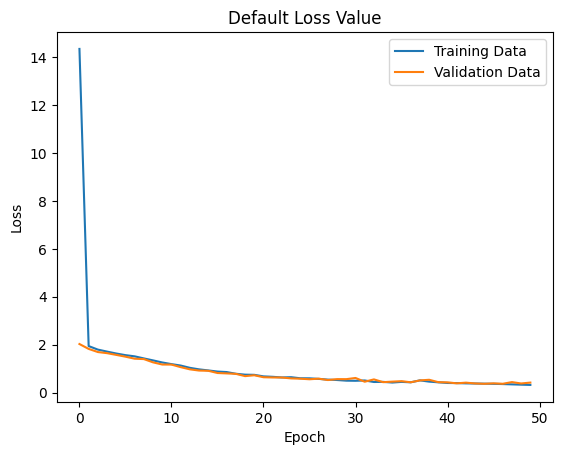

In [19]:
plt.plot(default_history.history['loss'])
plt.plot(default_history.history['val_loss'])
plt.title('Default Loss Value')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Data', 'Validation Data'])
plt.show()

- Accuracy

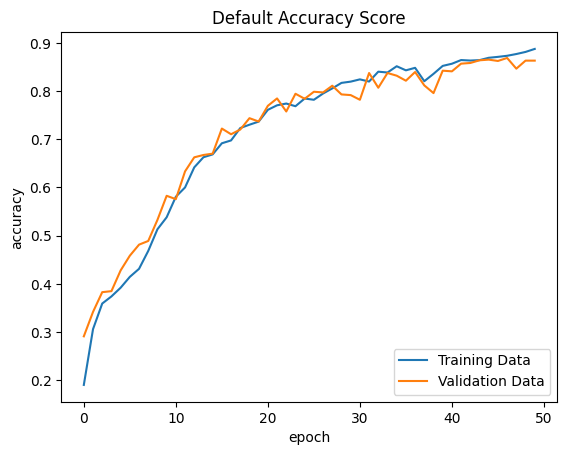

In [20]:
plt.plot(default_history.history['accuracy'])
plt.plot(default_history.history['val_accuracy'])

plt.title('Default Accuracy Score')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')

#### Analysis of Default Model

Untuk nilai loss dan accuracy pada model sebelum dilakukan improvement, kita dapat meliihat perbedaan antara loss dan accuracy training set dan validation set sangat kecil, dengan perbedaan yang tidak terlalu jauh. Hal ini menunjukkan bahwa model tidak overfitting atau underfitting, dan model menggeneralisasi dengan cukup baik pada data training set dan validation set. Sehingga kita dapat menyimpulkan bahwa model mempunyai keakuratan yang cukup baik.

Namun pada metric accuracy, kita melihat bahwa validation dan training data cenderung mengalami naik turun dengan perbedaan yang cukup signifikan, hal ini menunjukkan bahwa model mengalami sedikit exploding gradient sehingga model sudah mencapai epoch terakhir, model masih belum sampai convergence (perlu diingatkan bahwa model menggunakan earlystopping untuk berhenti training ketika sudah converge) walaupun sudah mencapai epoch terakhir, hal ini menunjukkan bahwa model masih belum sampai titik convergence dan model masih memerlukan waktu training yang lebih dengan penambahan jumlah epoch untuk dapat mencapai akurasi yang paling optimal. Sehingga, untuk memperbaiki model tersebut, kita akan melihat performa model kita yang sudah di-improve menggunakan transfer learning (MobileNetV2) dan penambahan hidden layer Dense.

#### Loss and Accuracy from Improved Model

- Loss

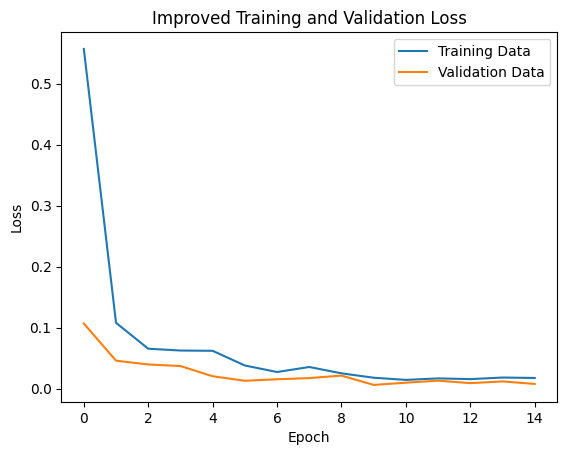

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Improved Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Data', 'Validation Data'])
plt.show()

- Accuracy

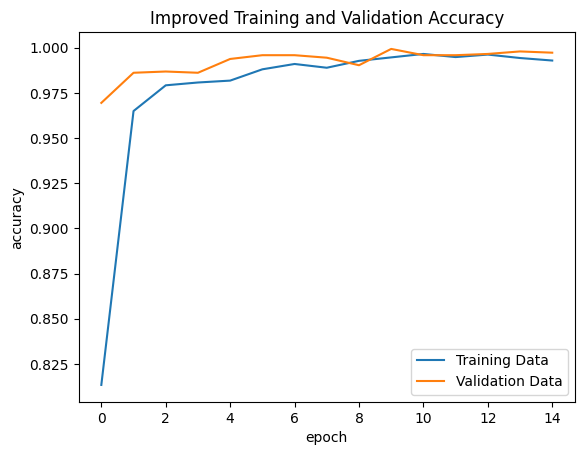

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Improved Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')

#### Analysis Improved Model

Berdasarkan nilai loss dan accuracy pada model yang sudah di-improve, beberapa kesimpulan yang dapat kita ambil adalah:

1. Model menggunakan epoch lebih sedikit, yang menunjukkan bahwa training time dan convergence speed pada model ini lebih baik dibandingkan dengan default model.

2. Perbedaan loss dan accuracy antara training dan validation set tidak berbeda jauh, yang menunjukkan bahwa model tidak terlalu overfitting dan memiliki kinerja generalisasi yang baik.

3. Model tidak ada exploding gradients maupun vanishing gradients, sehingga model sudah cukup stabil untuk dipakai dalam prediksi gambar baru.

Tetapi, perlu diperhatikan juga bahwa nilai loss pada validation kita lebih rendah dan nilai accuracy pada validation kita lebih tinggi dibandingkan dengan training set. Hal ini bukan merupakan sesuatu yang jarang dan dapat terjadi karena berbagai alasan seperti:

1. Pengocokan data (Data Shuffling): Selama proses training, data dishuffle sebelum setiap epoch, yang berarti bahwa training set dan validation set dapat memiliki distribusi yang sedikit berbeda. Hal ini dapat menyebabkan performa yang sedikit berbeda pada kedua set.

2. Regularisasi: Teknik regularisasi seperti dropout dan weight decay biasanya hanya diterapkan selama training dan tidak selama validation. Hal ini dapat menyebabkan performa validation sedikit lebih baik daripada performa training.

3. Perhitungan metrik: Metrik accuracy dan loss pada training set dihitung pada awal epoch sedangkan perhitungan metrik pada validation set dilakukan pada akhir epoch, sehingga performa pada validation set akan lebih baik.

Namun, karena perbedaan antara performa validation dan training relatif kecil, maka hal ini tidak perlu dikhawatirkan (e.g loss val = 0.16, loss train = 0.17). Tetapi, jika perbedaannya lebih besar, itu bisa menjadi indikasi overfitting. Dalam kasus seperti itu, ada baiknya untuk mencoba teknik regularisasi atau mengumpulkan lebih banyak data untuk meningkatkan performa generalisasi model.

Setelah menganalisis akurasi dan loss pada training set dan validation set pada kedua model, kita tidak perlu melakukan evaluasi pada training set menggunakan classification report dan confusion matrix, karena kita sudah tau performanya terhadap training set. Sehingga, kita akan langsung meng-evaluasi test set menggunakan model yang paling baik, yaitu model improved kita.

## Model Evaluation

Berdasarkan analisis yang sudah dilakukan pada Model Training, kita akan melanjutkan dengan evaluasi pada test set menggunakan improved model.

#### Evaluation on The Test Set

Kita akan melakukan evaluasi loss dan accuracy pada test dataset.

In [24]:
loss, accuracy = model.evaluate(test_gen)

15/15 [==============================] - 13s 765ms/step - loss: 0.0062 - accuracy: 0.9983


Berdasarkan evaluasi diatas, model berhasil mendapatkan akurasi yang hampir mendekati 1 dan loss yang mendekati 0, hal ini menunjukkan bahwa model hampir sempurna dalam klasifikasi model kita.

Selanjutnya, kita akan melakukan prediksi pada test set dan menunjukkan classification report dan confusion matrix pada test set.

kita akan memprediksi model kita menggunakan model.predict

In [25]:
y_pred = model.predict(test_gen)

Karena model pada Neural Network tidak memprediksi kelas secara langsung melainkan menghasilkan probabilitas untuk tiap kelas, kita perlu menggunakan np.argmax pada prediksi kita untuk menentukan probabilitas kelas yang paling tinggi untuk gambar yang diprediksi.

In [26]:
preds = np.argmax(y_pred, axis=1)
preds

array([2, 6, 6, ..., 1, 4, 6], dtype=int64)

In [27]:
labels = train_gen.class_indices
labels

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [28]:
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'Black Sea Sprat',
 1: 'Gilt-Head Bream',
 2: 'Hourse Mackerel',
 3: 'Red Mullet',
 4: 'Red Sea Bream',
 5: 'Sea Bass',
 6: 'Shrimp',
 7: 'Striped Red Mullet',
 8: 'Trout'}

In [29]:
prediction = [labels[k] for k in preds]
prediction[:5]

['Hourse Mackerel', 'Shrimp', 'Shrimp', 'Red Sea Bream', 'Striped Red Mullet']

Setelah itu, kita akan membuat classification report dan confusion matrix pada prediction set dengan test set.

In [30]:
matrix = confusion_matrix(df_test.Labels, prediction)
matrix

array([[187,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 218,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 199,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 224,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 203,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 206,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 190,   0,   0],
       [  0,   0,   0,   2,   0,   1,   0, 191,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 179]], dtype=int64)

Pada kasus ini, kita akan fokus pada metric accuracy. Model kita merupakan model multi class classification dimana model kita harus berhasil dalam mengidentifikasi setiap ikan yang ada pada kelas kita. Karena model kita tidak ada data imbalance, kita dapat menggunakan metric accuracy untuk difokuskan pada evaluasi model. Accuracy adalah metric yang baik untuk keseluruhan kinerja model karena memberikan bobot yang sama untuk semua kelas dan memberikan indikasi seberapa baik model dapat mengklasifikasikan setiap gambar dengan benar di semua kelas.

In [31]:
print(classification_report(df_test.Labels, prediction))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       187
   Gilt-Head Bream       1.00      1.00      1.00       218
   Hourse Mackerel       1.00      1.00      1.00       199
        Red Mullet       0.99      1.00      1.00       224
     Red Sea Bream       1.00      1.00      1.00       203
          Sea Bass       1.00      1.00      1.00       206
            Shrimp       1.00      1.00      1.00       190
Striped Red Mullet       1.00      0.98      0.99       194
             Trout       1.00      1.00      1.00       179

          accuracy                           1.00      1800
         macro avg       1.00      1.00      1.00      1800
      weighted avg       1.00      1.00      1.00      1800



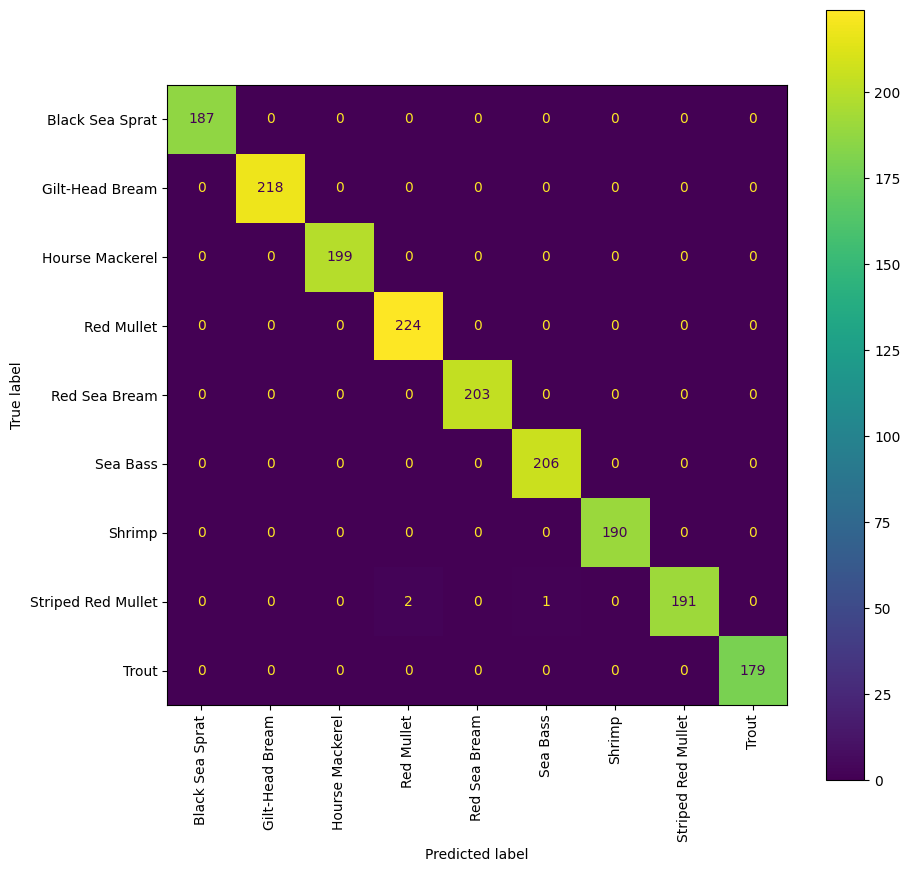

In [54]:
# create the confusion matrix display with display_labels and plot
cmd = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax=ax)

# rotate the x-axis tick labels
ax.tick_params(axis='x', labelrotation=90)

plt.show()

Berdasarkan classification report dan confusion matrix diatas, Performa keseluruhan model kita tampaknya sangat baik, dengan akurasi yang hampir sempurna (1.00 adalah nilai yang dibulatkan) pada dataset yang terdiri dari 1800 sampel. Presisi dan recall untuk setiap kelas juga tinggi, dengan sebagian besar kelas mencapai nilai sempurna. Macro average dan weighted average juga menunjukkan tingkat akurasi yang tinggi di semua kelas.

Jika kita melihat lebih dekat pada matriks kerancuan, kita dapat melihat bahwa ada 3 sampel yang misklasifikasi di kelas Striped Red Mullet, dimana gambar yang sebenarnya adalah Striped Red Mullet diklasifikasikan sebagai Red Mullet dan Sea Bass.

Selain itu, kita melihat bahwa performa pada training set, evaluation set dan testing set pada model kita sudah mempunyai akurasi dan loss yang mirip, sehingga kita dapat menyimpulkan bahwa model tidak terjadi overfitting maupun underfitting.

Meskipun akurasi model secara keseluruhan kita sangat tinggi, penting untuk melihat lebih dekat pada sampel yang salah klasifikasi untuk melihat apakah ada pola atau masalah umum yang dapat diatasi untuk meningkatkan kinerja model. Hal tersebut akan kita lakukan pada bagian berikutnya.

#### Analysis on Misclassified Data

Kita akan menunjukkan gambar pada kelas yang terjadi misklasifikasi berdasarkan confusion matrix diatas menggunakan kode dibawah.

In [37]:
misclassified_indices = np.where(prediction != df_test.Labels)[0]

In [38]:
misclassified_indices

array([ 293,  959, 1207], dtype=int64)

In [39]:
df_testing = df_test.reset_index(drop=True)

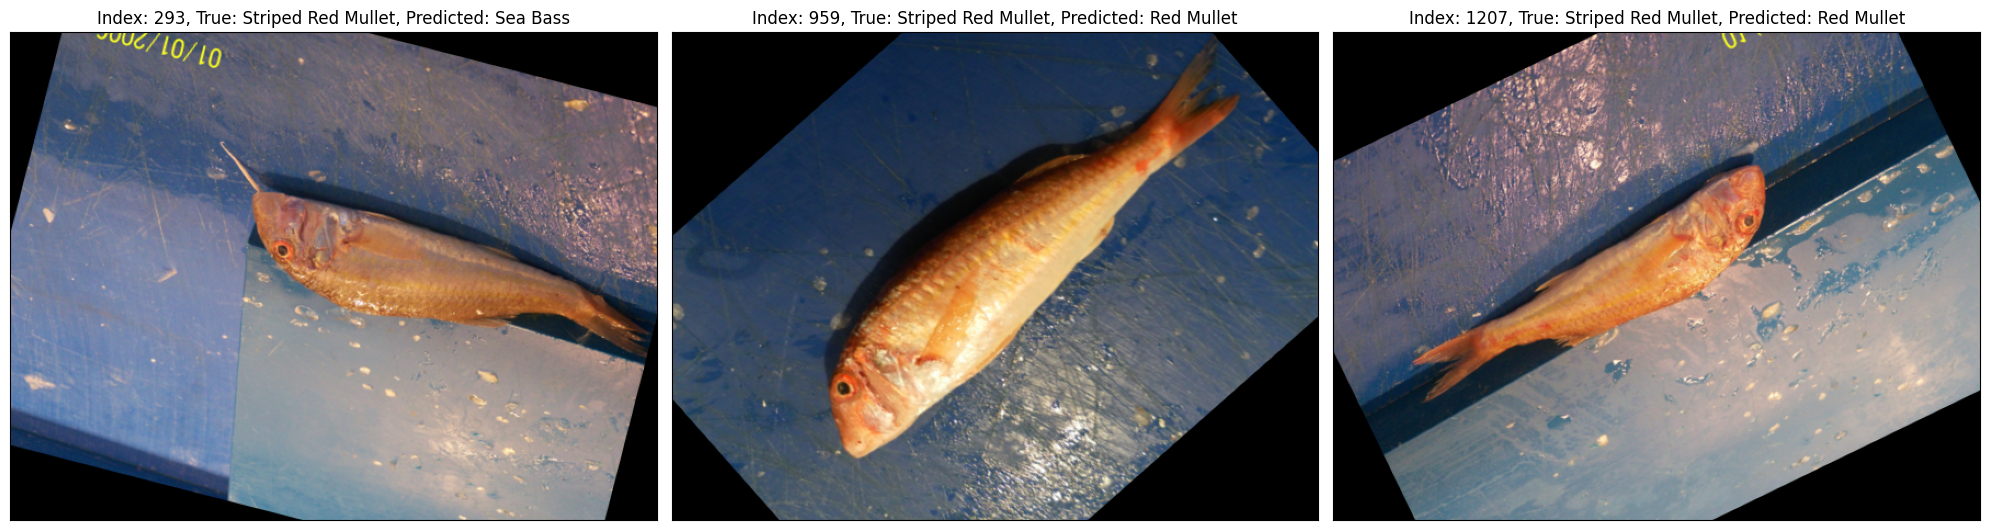

In [43]:
f, a = plt.subplots(nrows=1, ncols=3, figsize=(20, 20),
                    subplot_kw={'xticks': [], 'yticks': []})

for i, ax in zip(misclassified_indices, a.flat):
    ax.imshow(plt.imread(df_testing.Images[i]))
    ax.set_title(f"Index: {i}, True: {df_testing.Labels[i]}, Predicted: {prediction[i]}")
    
plt.tight_layout()
plt.show()


Berdasarkan gambar diatas, kita melihat bahwa kelas yang terjadi misklasifikasi hanya terjadi pada striped red mullet dimana gambar paling kiri diprediksi sebagai sea bass dan gambar yang lain diprediksi sebagai red mullet, beberapa alasan mengapa ini dapat terjadi antara lain adalah:
- Ciri-ciri yang mirip: Red mullet, striped red mullet dan sea bass mungkin memiliki ciri-ciri fisik atau karakteristik yang mirip, sehingga menyulitkan model untuk membedakannya. Contohnya, ketiga jenis ikan ini mungkin memiliki warna atau bentuk yang mirip sehingga membuatnya tampak sama, atau bisa saja di-akibatkan oleh gambar yang terjadi misklasifikasi merupakan gambar dengan lighting yang unik dibandingkan dengan gambar lain yang mengakibatkan terjadinya misklasifikasi.
- Model yang kompleks: Model dapat mengalami kesulitan untuk mempelajari perbedaan yang kecil antara striped red mullet, red mullet dan sea bass. Dalam hal ini, kita dapat mencoba menyesuaikan arsitektur model atau mengubahkan hyperparameter untuk meningkatkan performanya pada kasus ini.

#### Beberapa Metode untuk Model Improvement Lebih Lanjut

Dari semua analisis yang sudah dilakukan, kita dapat menyimpulkan bahwa model sudah sangat baik untuk memprediksi gambar pada test set, namun perlu dipertimbangkan juga bahwa gambar pada dataset kita mempunyai background yang mirip dan hanya ada 1 ikan di tiap foto (tidak ada foto dengan 2 atau lebih ikan dengan kelas yang sama pada 1 gambar). Sehingga, beberapa improvement yang dapat dilakukan pada model untuk mengeneralisir dan memprediksi foto ikan yang lebih luas adalah:

- Kumpulkan gambar yang lebih bervariasi: Salah satu cara untuk meningkatkan dataset kita adalah dengan mengumpulkan lebih banyak gambar ikan dengan background, lighting, dan orientasi yang berbeda. Sebagai contoh, kita dapat mengumpulkan gambar ikan di habitat aslinya, gambar yang diambil dari sudut yang berbeda, atau gambar yang diambil dalam lighting yang berbeda. Hal ini dapat membantu model belajar mengenali ikan dalam konteks yang berbeda dan menjadi lebih kuat terhadap variasi gambar masukan.

- Tambahkan gambar dengan banyak ikan: Seperti yang sudah dijelaskan, dataset kita hanya terdiri dari gambar ikan tunggal. Menambahkan gambar dengan banyak ikan dapat membantu model belajar mengenali berbagai jenis ikan dan membedakannya satu sama lain. Misalnya, kita dapat menambahkan gambar dengan dua atau lebih ikan dari spesies yang sama.

- Melakukan augmentasi data yang lebih bervariasi: Pada kasus ini, data augmentasi yang dilakukan adalah menggeser, zooming, rotasi dan membalikkan orientasi. Kita dapat menggunakan augmentasi data lagi dengan mengubah tingkat kecerahan atau kontras, atau menambahkan noise pada gambar, etc.

- Menggunakan dataset eksternal: Kita juga dapat mempertimbangkan untuk menggunakan dataset eksternal untuk melengkapi dataset yang sudah ada. Ada beberapa dataset gambar ikan yang tersedia untuk umum yang dapat digunakan, seperti dataset FishNet atau dataset Fish4Knowledge. Dataset ini terdiri dari gambar yang diambil dalam konteks yang berbeda dan dapat membantu meningkatkan keragaman dataset kita.

## Model Saving

In [56]:
model.save('model.h5')

## Model Inference

Inference akan dilakukan di notebook h8dsft_P2M2_inference.ipynb

## Kesimpulan

Kesimpulan yang dapat ditarik dari seluruh case study ini adalah:
- Proyek ini adalah untuk mengembangkan model klasifikasi gambar yang akurat dan efisien untuk identifikasi spesies ikan, dengan menggunakan teknik deep learning dan transfer learning. Model ini akan dioptimalkan untuk kecepatan,efisiensi dan akurasi sehingga cocok untuk aplikasi real-time di lapangan. Berdasarkan persyaratan itu, model yang sudah di-improve sudah cocok untuk dipakai pada kasus kita.

- Model kita berhasil dilakukan improvement dari model dasar menggunakan transfer learning berdasarkan model MobileNetV2 dan penambahan hidden layer dengan penambahan akurasi dan penurunan loss yang signifikan serta training time yang lebih cepat (accuracy: 0.862 -> 0.997, loss: 0.419 -> 0.007, training time: 4496.85 seconds-> 1331.79 seconds).

- Model terbaik kita mempunyai akurasi yang mendekati 1 (100%) dengan hanya ada 3 gambar yang misklasifikasi dari 1800 data yang diprediksi.

- Model dapat dilakukan improvement lebih lanjut dengan melakukan augmentasi yang lebih bervariasi, menggunakan dataset eksternal, penambahan gambar dengan banyak ikan pada 1 gambar, dan penambahan gambar yang lebih bervariasi (berbeda lighting, background, etc.) untuk training lebih lanjut supaya model dapat memprediksi dan mengeneralisir lebih baik.